In [ ]:
# Author: Tuğba GÜLER
#------------------------------------------------------------------------------------------------------------------------------------------
# Project Purpose: To predict a date for when vaccination will be completed for each country.
# The rationale used to do this:
# It is necessary to make a polynomial regression for each country within the given data.
# Data are generally parabolic. Therefore, the degree of polynomials is defined as 2.
# However, vaccination rates have slowed in some countries and are not suitable for this structure.
# To explain more clearly; Let's consider a parabola.
# When the parabola has a peak below 100, it may be downward. This means that countries with it will never reach 100% vaccination rate.
# There are also some countries with very low data numbers. In these cases, polynomial regression is not used. Linear regression is used.

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
from sklearn import linear_model
import io

In [ ]:
# takes date in string form and changes it into datetime format.
def time_convertion(d): 
    return (datetime.strptime(d, '%Y-%m-%d')) # year, month, day

In [ ]:
# calculate time difference between 2 datetime format dates, in days.
def time_diff(current,start):                     
    return (current-start).days

In [ ]:
# Upload file
from google.colab import files
uploaded = files.upload()

Saving share-people-vaccinated-covid.csv to share-people-vaccinated-covid (8).csv


In [ ]:
df = pd.read_csv(io.StringIO(uploaded['share-people-vaccinated-covid.csv'].decode('utf-8')))
df['Day'] = df['Day'].apply(time_convertion)

In [ ]:
# For Afghanistan, 2103-04-11 such an estimate was made. This is an undesirable method. 
# So these are ignored in the next code. 
# Countries with more vaccination and a high probability of ending soon have been cited.
countries = df['Entity'].unique()
keys = df.groupby('Entity').groups.keys()
for key in keys:
    this_df = df.loc[df['Entity'] == key]
    start = this_df.iloc[0].Day
    temp = pd.DataFrame()
    temp['time'] = this_df['Day'].apply(time_diff,args=(start,))
    temp['ratio'] = df['people_vaccinated_per_hundred']
    temp = temp.reset_index(drop=True)
    regr = linear_model.LinearRegression()
    regr.fit(temp[['time']],temp[['ratio']])
    t = regr.coef_
    g = regr.intercept_   
    if t==0 or t==0.0:
        t = temp['ratio'].iloc[0]
        if t==0:
            print('There is no estimation for '+ key + ' as they have not started vaccinations')
        else:
            vacc_time = (np.ceil((100-g)/t)) # calculate vaccination time 
            end = start+timedelta(days=int(vacc_time))
            print('The estimated date for '+ key + ': '+str(end.date()))
    else:
        vacc_time = (np.ceil((100-g)/t))
        end = start+timedelta(days=int(vacc_time))
        print('The estimated date for '+ key + ': '+str(end.date()))

The estimated date for Afghanistan: 2103-04-15
The estimated date for Africa: 2056-06-10
The estimated date for Albania: 2126-10-26
The estimated date for Andorra: 2024-08-23
The estimated date for Angola: 2062-03-31
The estimated date for Anguilla: 2021-05-25
The estimated date for Argentina: 2025-05-15
The estimated date for Asia: 2041-06-22
The estimated date for Australia: 2033-04-28
The estimated date for Austria: 2023-10-05
The estimated date for Azerbaijan: 2024-03-08
The estimated date for Bahrain: 2022-02-26
The estimated date for Bangladesh: 2025-03-21
The estimated date for Barbados: 2021-07-19
The estimated date for Belarus: 2109-08-17
The estimated date for Belgium: 2024-02-01
The estimated date for Belize: 2022-09-04
The estimated date for Bermuda: 2021-08-08
The estimated date for Bolivia: 2024-07-19
The estimated date for Brazil: 2024-08-12
The estimated date for Bulgaria: 2025-11-29
The estimated date for Cambodia: 2029-11-20
The estimated date for Canada: 2024-09-16
T

In [ ]:
# The code above has been optimized. The vaccination process has started and the countries that are possible to be completed in the near future have been printed.
dfM = df.copy()
start = dfM['Day'].min()
dfM['time_diff'] = dfM['Day'].apply(time_diff,args=(start,))
dfM_ohe = pd.concat([dfM, pd.get_dummies(dfM[['Entity']])], axis=1).drop(columns=['Entity','Code','Day'])
t = dfM_ohe.drop(columns = 'people_vaccinated_per_hundred')
g = dfM_ohe['people_vaccinated_per_hundred']
lm = linear_model.LinearRegression(fit_intercept = False)
lm.fit(t, g)
coef = lm.coef_
inter = lm.intercept_
dates = []
for inter in range(139):
    dates.append(int(np.ceil((100-coef[inter+1])/coef[0])))
inter = 0
for key in keys:
    end = start+timedelta(days=dates[inter])
    inter = inter+1
    print('The estimated date for '+ key + ': '+str(end.date()))

The estimated date for Afghanistan: 2022-08-18
The estimated date for Africa: 2022-08-08
The estimated date for Albania: 2022-07-18
The estimated date for Andorra: 2022-07-28
The estimated date for Angola: 2022-08-28
The estimated date for Anguilla: 2022-05-11
The estimated date for Argentina: 2022-08-03
The estimated date for Asia: 2022-07-23
The estimated date for Australia: 2022-08-20
The estimated date for Austria: 2022-07-13
The estimated date for Azerbaijan: 2022-08-05
The estimated date for Bahrain: 2022-05-28
The estimated date for Bangladesh: 2022-08-07
The estimated date for Barbados: 2022-06-17
The estimated date for Belarus: 2022-08-01
The estimated date for Belgium: 2022-07-14
The estimated date for Belize: 2022-08-24
The estimated date for Bermuda: 2022-05-16
The estimated date for Bolivia: 2022-08-27
The estimated date for Brazil: 2022-07-27
The estimated date for Bulgaria: 2022-07-25
The estimated date for Cambodia: 2022-08-22
The estimated date for Canada: 2022-07-19
T

In [ ]:
# Methods Descriptions
# Predicts the due date for vaccinations. 
# for each country, the number of data it has is checked.
# The data fit into the 2nd order polynomial as ax ^ 2 + bx + c = 0.
# Solves ax ^ 2 + bx + c-100 = 0 to find that this model reaches 100 and takes the root.
# uses a linear regression if the roots are not real (ie down with the vertex <100).
# This method was also developed for using graphs to compare countries.
def estimating_vaccation_end_date(df,key):             
    this_df = df.loc[df['Entity'] == key]    
    if this_df.shape[0]>2:               
        start = this_df.iloc[0].Day          
        temp = pd.DataFrame()     
        temp['time'] = this_df['Day'].apply(time_diff,args=(start,))
        temp['ratio'] = this_df['people_vaccinated_per_hundred']
        temp = temp.reset_index(drop=True)
        res = np.polyfit(temp['time'], temp['ratio'], 2) # Polynomial degree 2
        po = np.poly1d(res)
        tg = (po + np.poly1d([-100])).r
        Rroots = []
        check = False
        for aa in tg:
            if aa.dtype == 'float64':
                Rroots.append(aa)
                check = True
        if len(Rroots)!=0:
            for root in Rroots:
                if root>0:
                    vacc_time = root
        else:
            res = np.polyfit(temp['time'], temp['ratio'], 1) # Polynomial degree 1 (Linear)
            po = np.poly1d(res)
            tg = (po + np.poly1d([-100])).r
            vacc_time = tg[0]
        vacc_time = (np.ceil(vacc_time))
        end = start+timedelta(days=int(vacc_time))
    elif this_df.shape[0]>1:
        this_df = df.loc[df['Entity'] == key]
        start = this_df.iloc[0].Day
        temp = pd.DataFrame()
        temp['time'] = this_df['Day'].apply(time_diff,args=(start,))
        temp['ratio'] = this_df['people_vaccinated_per_hundred']
        temp = temp.reset_index(drop=True)
        res = np.polyfit(temp['time'], temp['ratio'], 1) # Polynomial degree 1 (Linear)
        po = np.poly1d(res)
        tg = (po + np.poly1d([-100])).r
        if(len(tg)==0):
            end = -1  # Exceptional. Valid where the vaccine is 0 for all dates.
        else:
            vacc_time = tg[0]
            vacc_time = (np.ceil(vacc_time))
            end = start+timedelta(days=int(vacc_time))
    else:
        start = this_df.iloc[0].Day
        rate = this_df.iloc[0].people_vaccinated_per_hundred
        vacc_time = np.ceil(100/rate)
        end = start+timedelta(days=int(vacc_time))
        po = np.poly1d([rate, 0])
        temp = pd.DataFrame()
        temp['time'] = this_df['Day'].apply(time_diff,args=(start,))
        temp['ratio'] = this_df['people_vaccinated_per_hundred']
        temp = temp.reset_index(drop=True)
    return start, end, temp,po  #The start date, end date, current data and polynomial are obtained as output. To use in graph.

In [ ]:
counts = df['Entity'].value_counts()   #the countries are sorted by their number of datas
keys = counts.reset_index()['index']   
dates=[]
for key in keys:
    start,end,dummy1,dummy2 = estimating_vaccation_end_date(df,key)
    if end == -1: # no predict estimation
        print('There is no estimation for '+ key + ' as they have not started vaccinations') 
    else:  # predict estimation
        print('The estimated date for '+ key + ': '+str(end.date()))
        dates.append([key,end.date()])

The estimated date for World: 2022-05-15
The estimated date for North America: 2021-09-14
The estimated date for Asia: 2022-10-26
The estimated date for Israel: 2021-05-05
The estimated date for Europe: 2021-10-21
The estimated date for South America: 2021-12-27
The estimated date for Chile: 2021-05-13
The estimated date for European Union: 2021-10-31
The estimated date for Italy: 2021-10-26
The estimated date for Bahrain: 2022-02-05
The estimated date for Austria: 2021-10-21
The estimated date for Romania: 2022-02-28
The estimated date for Denmark: 2021-09-15
The estimated date for Norway: 2021-11-04
The estimated date for Czechia: 2021-11-16
The estimated date for Germany: 2021-11-10
The estimated date for Slovenia: 2021-10-22
The estimated date for France: 2021-12-06
The estimated date for Belgium: 2022-03-26
The estimated date for Portugal: 2021-10-15
The estimated date for Bulgaria: 2021-10-27
The estimated date for Lithuania: 2021-09-16
The estimated date for Latvia: 2021-11-28
T

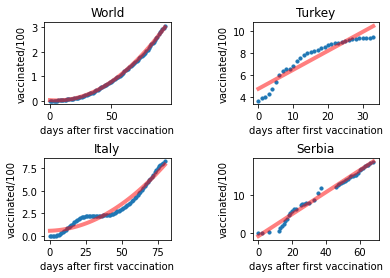

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.65, hspace=0.65)


ax1.set_title('World')
dummy1,dummy2,temp1,po1 = estimating_vaccation_end_date(df,'World')
ax1.scatter(temp1['time'],temp1['ratio'],zorder=1,s=10)
y = po1(temp1['time'])
ax1.plot(temp1['time'], y,'r',linewidth=4, zorder=2,alpha = 0.5)

ax2.set_title('Turkey')
dummy1,dummy2,temp2,po2 = estimating_vaccation_end_date(df,'Turkey')
ax2.scatter(temp2['time'],temp2['ratio'],zorder=1,s=10)
y = po2(temp2['time'])
ax2.plot(temp2['time'], y,'r',linewidth=4, zorder=2,alpha = 0.5)

ax3.set_title('Italy')
dummy1,dummy2,temp3,po3 = estimating_vaccation_end_date(df,'Italy')
ax3.scatter(temp3['time'],temp3['ratio'],zorder=1,s=10)
y = po3(temp3['time'])
ax3.plot(temp3['time'], y,'r',linewidth=4, zorder=2,alpha = 0.5)

ax4.set_title('Serbia')
dummy1,dummy2,temp4,po4 = estimating_vaccation_end_date(df,'Serbia')
ax4.scatter(temp4['time'],temp4['ratio'],zorder=1,s=10)
y = po4(temp4['time'])
ax4.plot(temp4['time'], y,'r',linewidth=4, zorder=2,alpha = 0.5)

ax1.set(xlabel='days after first vaccination', ylabel='vaccinated/100')
ax2.set(xlabel='days after first vaccination', ylabel='vaccinated/100')
ax3.set(xlabel='days after first vaccination', ylabel='vaccinated/100')
ax4.set(xlabel='days after first vaccination', ylabel='vaccinated/100')
plt.show()

<function matplotlib.pyplot.show>

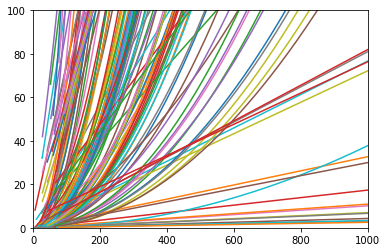

In [ ]:
toPlot = keys
start=[]
end=[]
pol=[]
for pl in toPlot:
    st,en,dummy,po=estimating_vaccation_end_date(df,pl)
    if en==-1:
        continue
    start.append(st)
    end.append(en)
    pol.append(po)
start_time = min(start)
end_time = max(end)

for i in range(len(pol)):
    start_diff = time_diff(start[i],start_time)
    true_end = time_diff(end[i],start_time)
    x = range(start_diff,true_end)
    y=pol[i](x)
    plt.plot(x,y)
plt.gca().set_ylim([0,100])
plt.gca().set_xlim([0,1000])

plt.show